<a href="https://colab.research.google.com/github/VilmarJNR/ONE-TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extração

In [224]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

In [225]:
#link dos dados
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [226]:
#lendo os dados
dados = requests.get(url).json()
df = pd.json_normalize(dados)

In [227]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [228]:
#informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [229]:
#somando valores vazios
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [230]:
#duplicadas
duplicados = df.duplicated().sum()
print(f'Existem {duplicados} duplicados')

#se já tiver duplicadas para removelas
if duplicados > 0:
  df = df.drop_duplicates()
  print(f'Duplicadas removidas! {df.shape}')

Existem 0 duplicados


In [231]:
#verificar null
valor_ausente = df.isnull().any(axis=1).sum()

if valor_ausente > 0:
  df = df.dropna()
  print(f'Valores ausentes removidos! {df.shape}')
else:
  print('Não existem valores ausentes')

Não existem valores ausentes


In [232]:
# Converter 'Charges.Total' para numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [233]:
# Codificar 'Churn' (Yes/No → 1/0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [234]:
# Verificando dados vazios
df.isna().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [235]:
# Tratado os valores vazios ['Churn']
df = df.dropna()
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [236]:
# Verificar os valores únicos em cada coluna
for coluna in df.columns:
    valores_unicos = df[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores únicos na coluna customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


Valores únicos na coluna Churn:
[0. 1.]


Valores únicos na coluna customer.gender:
['Female' 'Male']


Valores únicos na coluna customer.SeniorCitizen:
[0 1]


Valores únicos na coluna customer.Partner:
['Yes' 'No']


Valores únicos na coluna customer.Dependents:
['Yes' 'No']


Valores únicos na coluna customer.tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


Valores únicos na coluna phone.PhoneService:
['Yes' 'No']


Valores únicos na coluna phone.MultipleLines:
['No' 'Yes' 'No phone service']


Valores únicos na coluna internet.InternetService:
['DSL' 'Fiber optic' 'No']


Valores únicos na coluna internet.OnlineSecurity:
['No' 'Yes' 'No internet service']


Valores únicos na coluna 

In [237]:
#transformar/ traduzir colunas
df.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [238]:
#alterando nome das colunas
df = df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelado',
    'customer.gender': 'Sexo',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.PaymentMethod': 'Forma_Pagamento',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total'
})
df.head()

,ID_Cliente,Cancelado,Sexo,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [239]:
#contando quantos clientes estão zerados em meses de contrato
df.query('Meses_Contrato == 0')['ID_Cliente'].count()

np.int64(0)

In [240]:
#tirando os clientes zerados
df = df[df['Meses_Contrato'] != 0]

In [241]:
#verificando se ainda tem o número "0"
print(df['Meses_Contrato'].unique())

[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


In [242]:
df.Cancelado.value_counts()

,count
Cancelado,
0.0,5163
1.0,1869


In [243]:
#removendo valor vazio caso ainda tenha
df.dropna(inplace=True)
df.Cancelado.value_counts()

,count
Cancelado,
0.0,5163
1.0,1869


In [244]:
# criando a coluna Contas_Diarias
df['Gasto_Diario'] = (df['Gasto_Mensal'] / 30).apply(lambda x: f'{x:,.2f}')

#convertendo para float
df['Gasto_Diario'] = pd.to_numeric(df['Gasto_Diario'], errors='coerce')
df.head()

,ID_Cliente,Cancelado,Sexo,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7032 non-null   object 
 1   Cancelado             7032 non-null   float64
 2   Sexo                  7032 non-null   object 
 3   Idoso                 7032 non-null   int64  
 4   Parceiro              7032 non-null   object 
 5   Dependentes           7032 non-null   object 
 6   Meses_Contrato        7032 non-null   int64  
 7   Servico_Telefonico    7032 non-null   object 
 8   Multiplas_Linhas      7032 non-null   object 
 9   Servico_Internet      7032 non-null   object 
 10  Seguranca_Online      7032 non-null   object 
 11  Backup_Online         7032 non-null   object 
 12  Protecao_Dispositivo  7032 non-null   object 
 13  Suporte_Tecnico       7032 non-null   object 
 14  Streaming_TV          7032 non-null   object 
 15  Streaming_Filmes      7032

In [246]:
colunas = df.columns
colunas

Index(['ID_Cliente', 'Cancelado', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
       'Meses_Contrato', 'Servico_Telefonico', 'Multiplas_Linhas',
       'Servico_Internet', 'Seguranca_Online', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online', 'Forma_Pagamento',
       'Gasto_Mensal', 'Gasto_Total', 'Gasto_Diario'],
      dtype='object')

In [247]:
df.head(3)

,ID_Cliente,Cancelado,Sexo,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46


In [248]:
colunas_binarias = ['Parceiro', 'Dependentes',
      'Servico_Telefonico', 'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online']

for coluna in colunas_binarias:
    print('-> Coluna: ',coluna)
    print(df[coluna].value_counts())
    print('---')

-> Coluna:  Parceiro
Parceiro
No     3639
Yes    3393
Name: count, dtype: int64
---
-> Coluna:  Dependentes
Dependentes
No     4933
Yes    2099
Name: count, dtype: int64
---
-> Coluna:  Servico_Telefonico
Servico_Telefonico
Yes    6352
No      680
Name: count, dtype: int64
---
-> Coluna:  Multiplas_Linhas
Multiplas_Linhas
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
---
-> Coluna:  Seguranca_Online
Seguranca_Online
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
---
-> Coluna:  Backup_Online
Backup_Online
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
---
-> Coluna:  Protecao_Dispositivo
Protecao_Dispositivo
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
---
-> Coluna:  Suporte_Tecnico
Suporte_Tecnico
No                     3472
Yes              

In [249]:
# Substituir "No internet service" & "No phone service"→ "No"

# colunas relevantes
colunas_internet = [
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV','Streaming_Filmes'
]

# Substituir nas colunas de internet
for coluna in colunas_internet:
    df[coluna] = df[coluna].replace('No internet service', 'No')

# Substituir na coluna de telefonia
df['Multiplas_Linhas'] = df['Multiplas_Linhas'].replace('No phone service', 'No')

In [250]:
#padronizando as culunas
df[colunas_binarias] = df[colunas_binarias].replace({'Yes' : 1, 'No' : 0})

/tmp/ipython-input-250-623541761.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_binarias] = df[colunas_binarias].replace({'Yes' : 1, 'No' : 0})


#📊 Carga e análise

#Distribuição de **Churn**

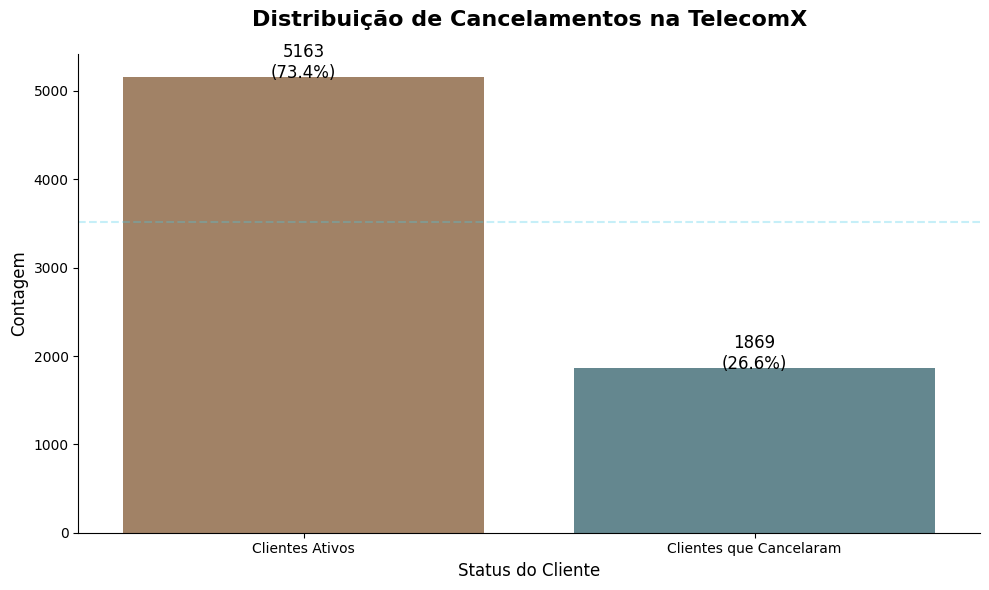

In [251]:
#configuração do gráfico porcentagem de cancelamento
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Cancelado', hue='Cancelado', data=df, palette=['#AB815C', '#5D8C96'], legend=False)

#remover bordas
sns.despine(top=True, right=True)

#título e rótulos
plt.title('Distribuição de Cancelamentos na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

#alterar rótulos do eixo x
ax.set_xticks([0, 1])  # Se Cancelado for binário: 0 e 1
ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])

#adicionar porcentagens
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
     (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

#adicionar linha de média
plt.axhline(y=total/2, color='#44CDEB', linestyle='--', alpha=0.3)

#exibir gráfico
plt.tight_layout()
plt.show()

#Análise por **Idade**

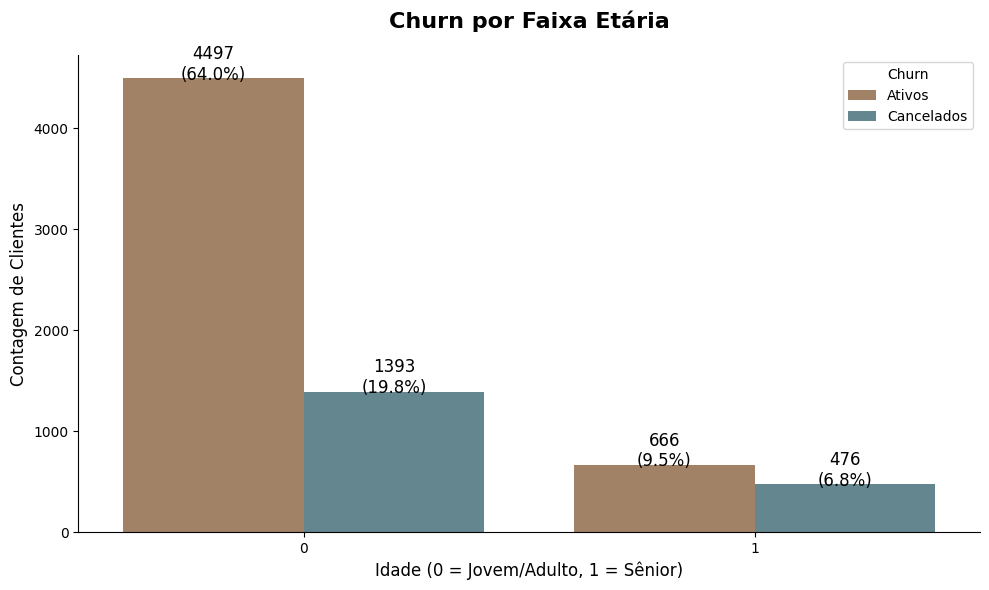

In [252]:
#configurando gráfico por idade
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Idoso', hue='Cancelado', data=df, palette=['#AB815C', '#5D8C96'], legend=False)

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Churn por Faixa Etária', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Idade (0 = Jovem/Adulto, 1 = Sênior)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

#adicionar porcentagens
total = len(df)


#adicionar valores nas barras
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
     (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

#legenda
plt.legend(title='Churn', labels=['Ativos', 'Cancelados'])

#exibir gráfico
plt.tight_layout()
plt.show()

#Análise por **Gênero**

In [253]:
#conta a quantidade de cada gênero e ordena os gêneros em ordem alfabética
totals = df['Sexo'].value_counts().sort_index().values
totals

array([3483, 3549])

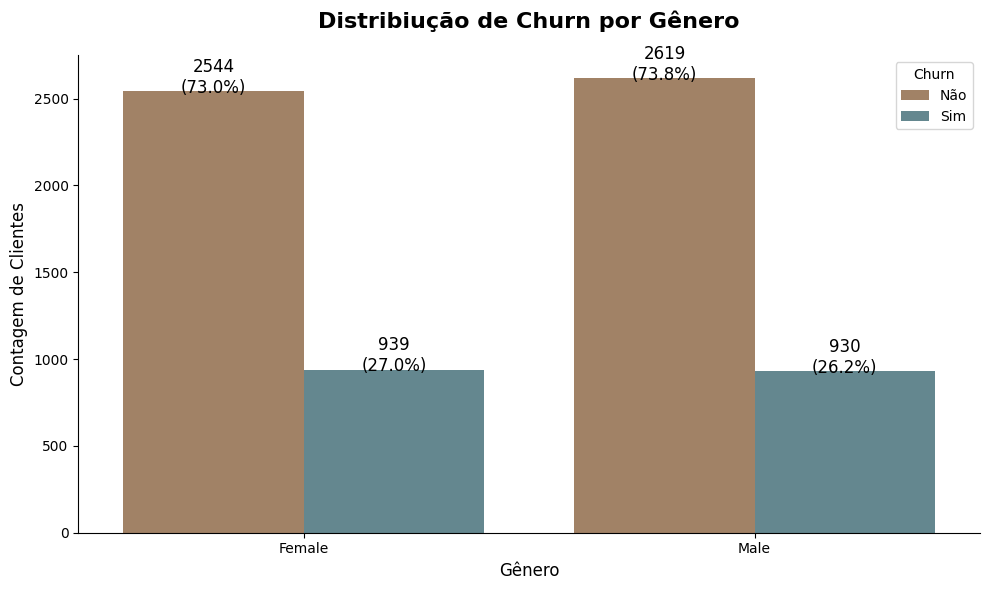

In [254]:
#criando gráfico por Gênero
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sexo', hue='Cancelado', data=df, palette=['#AB815C', '#5D8C96'], legend=False)

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Distribiução de Churn por Gênero', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

#adicionar valores nas barras
for i,p in enumerate(ax.patches):
  #calcular porcentagemm relativa ao gënero
  sexo_index = i % len(totals)
  percentage = f'{100 * p.get_height() / totals[sexo_index]:.1f}%'
  ax.annotate(f'{int(p.get_height())}\n({percentage})',
     (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

#exibir gráfico
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

#Análise por **Tipo de Contrato**

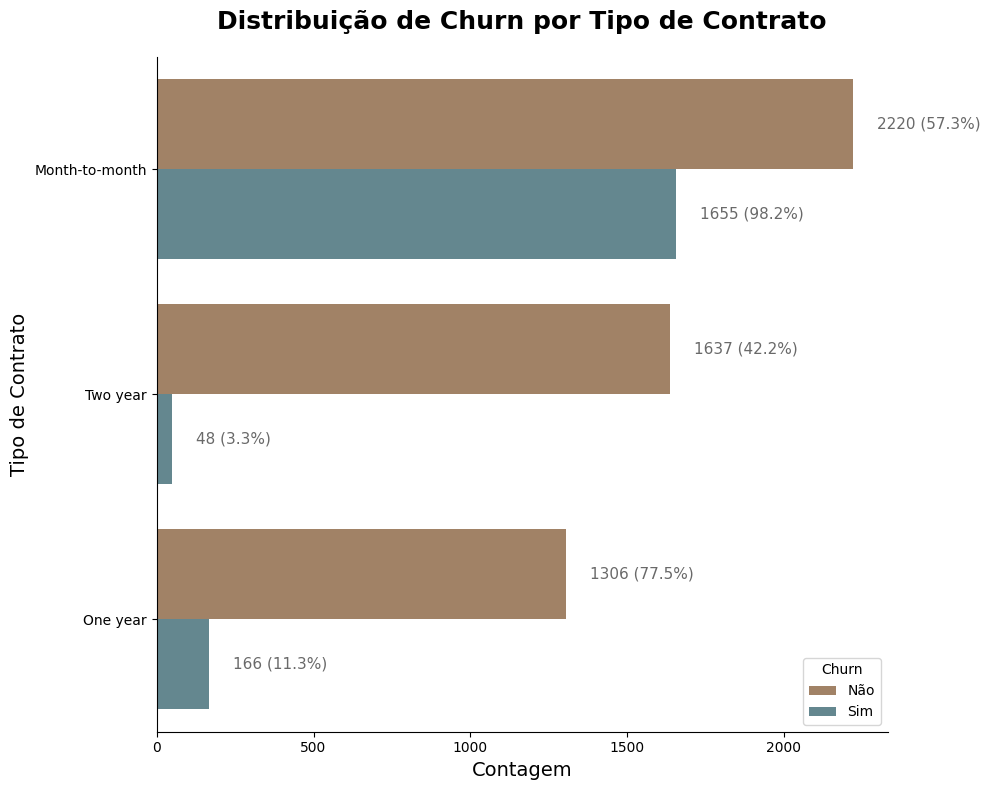

In [255]:
#configurar gráfico do tipo de contrato
sns.set_palette(['#AB815C', '#5D8C96'])

#criar gráfico
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Tipo_Contrato', hue='Cancelado', data=df,
                   order=df['Tipo_Contrato'].value_counts().index
)

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Tipo de Contrato', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'], frameon=True)

# Calcular totais por categoria
contract_counts = df['Tipo_Contrato'].value_counts()
yticks_labels = [label.get_text() for label in ax.get_yticklabels()]
totals = contract_counts.reindex(yticks_labels).fillna(0).values

# Adicionar porcentagens e valores
for i, bar in enumerate(ax.patches):
    category_idx = i // 2  # 2 barras por categoria
    if category_idx < len(totals) and totals[category_idx] > 0:
        percentage = 100 * bar.get_width() / totals[category_idx]
        x_pos = bar.get_width() + max(totals)*0.02
        y_pos = bar.get_y() + bar.get_height()/2
        ax.text(
            x_pos,
            y_pos,
            f'{int(bar.get_width())} ({percentage:.1f}%)',
            va='center',
            ha='left',
            fontsize=11,
            color='dimgrey'
        )

#exibir gráfico
plt.tight_layout()
plt.show()

#Análise por **Serviços Adicionais**

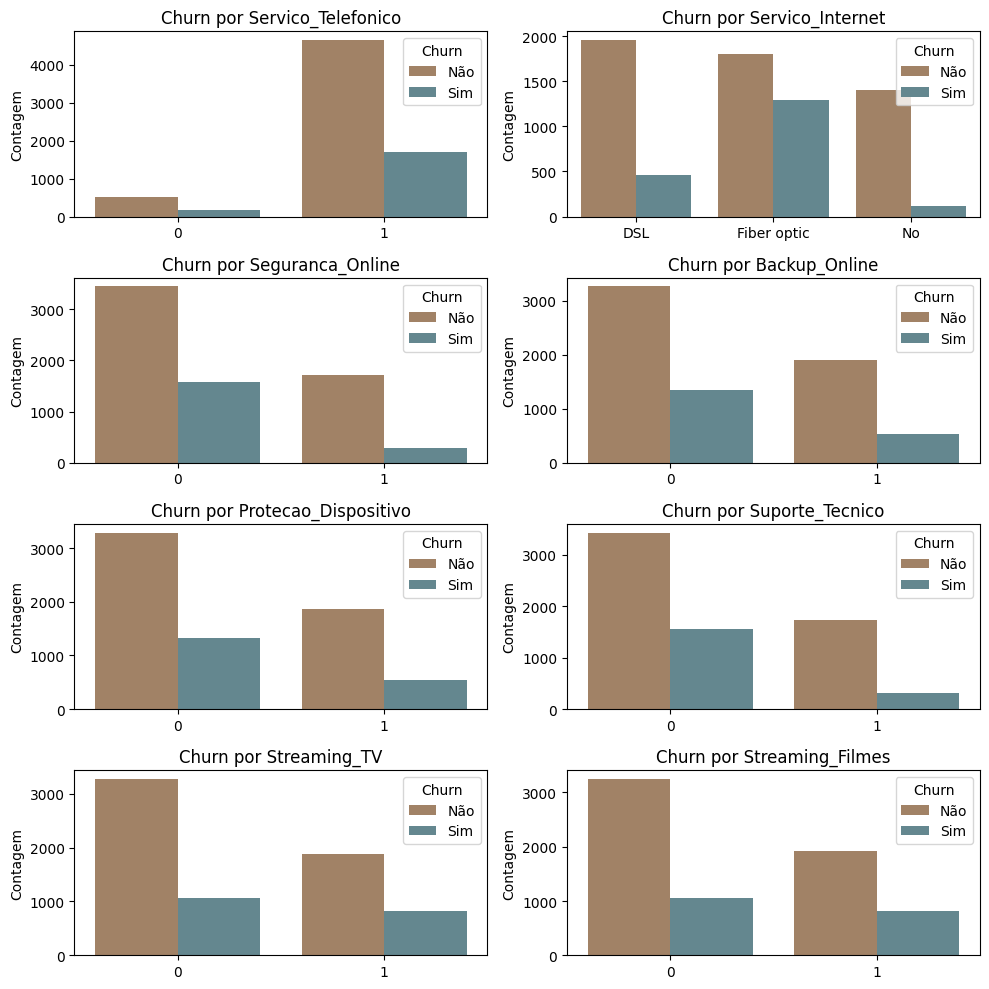

In [257]:
servicos_adicionais = ['Servico_Telefonico', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online',
                       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']

plt.figure(figsize=(10, 10))

#fazer uma imagem para cada serviço
for i, servico in enumerate(servicos_adicionais, 1):
    plt.subplot(4,2, i)
    sns.countplot(x=servico, hue='Cancelado', data=df, palette=['#AB815C', '#5D8C96'])
    plt.title(f'Churn por {servico}')
    plt.xlabel('')
    plt.ylabel('Contagem')
    plt.legend(title='Churn', labels=['Não', 'Sim'])

#gerar gráfico
plt.tight_layout()
plt.show()

#Análise por **Método de Pagamento**

#📄Relatorio Final